In [1]:
import pandas as pd
import numpy as np
import os
import glob
from itertools import combinations
from collections import defaultdict
from random import sample
import random
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('poster')
sns.set_theme(style="whitegrid")
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

mapper={0:'Stand Still',1:'Treadmill Walk',2:'Treadmill Run',3:'Ground Walk',4:'Squat',5:'Lunge',6:'Jumping Jack'}

In [2]:
def get_attention_label(exp_num, test_num):
    main_np_dir = f'dataset/attention_tsne/EXP{exp_num}/test_{test_num}/channel_test_attention.npy'
    attention_label_dir = f'dataset/attention_tsne/EXP{exp_num}/test_{test_num}/channel_test_attention_scores.csv'
    main_np = np.load(main_np_dir)
    attention_label = pd.read_csv(attention_label_dir)
    attention_score = pd.DataFrame(main_np.squeeze())
    attention_score['label'] = attention_label['y_true']
    attention_score['label'] = attention_score['label'].map(mapper)
    attention_score['color'] = attention_score['label'].map({'Stand Still':'#FF5733', 'Treadmill Walk':'#FF0000', 'Treadmill Run':'#1E90FF', 'Ground Walk':'#4CBB17', 'Squat':'#8B008B', 'Lunge':'#00CED1', 'Jumping Jack':'#FF69B4'})
    return attention_score

In [6]:
def run_tsne(attention_score):
    tsne_np = TSNE(n_components=2, perplexity=10, learning_rate='auto', random_state=0).fit_transform(attention_score.iloc[:, :-2])
    tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1'])

    return tsne_df

In [18]:
cbam_dict = {}
se_dict = {}
simam_dict = {}
depthwise_dict = {}
depthwise_ortho_dict = {}

for i in range(5):
    cbam_1010 = get_attention_label(1010, i)
    se_1011 = get_attention_label(1011, i)
    simam_1012 = get_attention_label(1012, i)
    depthwise_1020 = get_attention_label(1020, i)

    cbam_tsne = run_tsne(cbam_1010)
    se_tsne = run_tsne(se_1011)
    simam_tsne = run_tsne(simam_1012)
    depthwise_tsne = run_tsne(depthwise_1020)

    cbam_silhouette_score = silhouette_score(cbam_tsne, cbam_1010['label'])
    se_silhouette_score = silhouette_score(se_tsne, se_1011['label'])
    simam_silhouette_score = silhouette_score(simam_tsne, simam_1012['label'])
    depthwise_silhouette_score = silhouette_score(depthwise_tsne, depthwise_1020['label'])

    cbam_davis_bouldin_score = davies_bouldin_score(cbam_tsne, cbam_1010['label'])
    se_davis_bouldin_score = davies_bouldin_score(se_tsne, se_1011['label'])
    simam_davis_bouldin_score = davies_bouldin_score(simam_tsne, simam_1012['label'])
    depthwise_davis_bouldin_score = davies_bouldin_score(depthwise_tsne, depthwise_1020['label'])

    cbam_calinski_harabasz_score = calinski_harabasz_score(cbam_tsne, cbam_1010['label'])
    se_calinski_harabasz_score = calinski_harabasz_score(se_tsne, se_1011['label'])
    simam_calinski_harabasz_score = calinski_harabasz_score(simam_tsne, simam_1012['label'])
    depthwise_calinski_harabasz_score = calinski_harabasz_score(depthwise_tsne, depthwise_1020['label'])

    cbam_dict[i] = [cbam_silhouette_score, cbam_davis_bouldin_score, cbam_calinski_harabasz_score]
    se_dict[i] = [se_silhouette_score, se_davis_bouldin_score, se_calinski_harabasz_score]
    simam_dict[i] = [simam_silhouette_score, simam_davis_bouldin_score, simam_calinski_harabasz_score]
    depthwise_dict[i] = [depthwise_silhouette_score, depthwise_davis_bouldin_score, depthwise_calinski_harabasz_score]



/root/miniconda3/envs/vit/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/root/miniconda3/envs/vit/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/root/miniconda3/envs/vit/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/root/miniconda3/envs/vit/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/root/miniconda3/envs/vit/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/root/miniconda3/env

In [7]:
# create dataframe from dictionary
cbam_df = pd.DataFrame.from_dict(cbam_dict, orient='index', columns=['Silhouette Score', 'Davis Bouldin Score', 'Calinski Harabasz Score'])
se_df = pd.DataFrame.from_dict(se_dict, orient='index', columns=['Silhouette Score', 'Davis Bouldin Score', 'Calinski Harabasz Score'])
simam_df = pd.DataFrame.from_dict(simam_dict, orient='index', columns=['Silhouette Score', 'Davis Bouldin Score', 'Calinski Harabasz Score'])
depthwise_df = pd.DataFrame.from_dict(depthwise_dict, orient='index', columns=['Silhouette Score', 'Davis Bouldin Score', 'Calinski Harabasz Score'])
depthwise_ortho_df = pd.DataFrame.from_dict(depthwise_ortho_dict, orient='index', columns=['Silhouette Score', 'Davis Bouldin Score', 'Calinski Harabasz Score'])

NameError: name 'cbam_dict' is not defined

In [3]:
# save dataframe to pickle
cbam_df.to_pickle('dataset/attention_tsne/cbam_clustering_metrics.pkl')
se_df.to_pickle('dataset/attention_tsne/se_clustering_metrics.pkl')
simam_df.to_pickle('dataset/attention_tsne/simam_clustering_metrics.pkl')
depthwise_df.to_pickle('dataset/attention_tsne/depthwise_clustering_metrics.pkl')
depthwise_ortho_df.to_pickle('dataset/attention_tsne/depthwise_ortho_clustering_metrics.pkl')


NameError: name 'cbam_df' is not defined

In [4]:
# load dataframe from pickle
cbam_df = pd.read_pickle('dataset/attention_tsne/cbam_clustering_metrics.pkl')
se_df = pd.read_pickle('dataset/attention_tsne/se_clustering_metrics.pkl')
simam_df = pd.read_pickle('dataset/attention_tsne/simam_clustering_metrics.pkl')
depthwise_df = pd.read_pickle('dataset/attention_tsne/depthwise_clustering_metrics.pkl')
depthwise_ortho_df = pd.read_pickle('dataset/attention_tsne/depthwise_ortho_clustering_metrics.pkl')

In [5]:
# until 2nd digit
cbam_df.mean(), se_df.mean(), simam_df.mean(), depthwise_df.mean()

(Silhouette Score           -0.042762
 Davis Bouldin Score        54.248670
 Calinski Harabasz Score    19.300114
 dtype: float64,
 Silhouette Score           -0.049543
 Davis Bouldin Score        61.673315
 Calinski Harabasz Score    31.971780
 dtype: float64,
 Silhouette Score             -0.025755
 Davis Bouldin Score           5.328095
 Calinski Harabasz Score    1354.132045
 dtype: float64,
 Silhouette Score              0.035871
 Davis Bouldin Score           5.992411
 Calinski Harabasz Score    2194.583301
 dtype: float64)

In [6]:
cbam_df.std(), se_df.std(), simam_df.std(), depthwise_df.std()

(Silhouette Score            0.006251
 Davis Bouldin Score        26.138677
 Calinski Harabasz Score     3.069570
 dtype: float64,
 Silhouette Score            0.016904
 Davis Bouldin Score        38.835790
 Calinski Harabasz Score    30.224706
 dtype: float64,
 Silhouette Score           0.0
 Davis Bouldin Score        0.0
 Calinski Harabasz Score    0.0
 dtype: float64,
 Silhouette Score             0.009227
 Davis Bouldin Score          3.625686
 Calinski Harabasz Score    134.863706
 dtype: float64)

In [7]:
columns = ['tSNE1','tSNE2','label','color']
cbam_tsne_df = pd.read_csv('dataset/attention_tsne/cbam_tsne.csv')[columns]
se_tsne_df = pd.read_csv('dataset/attention_tsne/se_tsne.csv')[columns]
simam_tsne_df = pd.read_csv('dataset/attention_tsne/simam_tsne.csv')[columns]
depthwise_tsne_df = pd.read_csv('dataset/attention_tsne/depthwise_tsne.csv')[columns]

In [8]:
# TSNE Plot
def tsne_plot(tsne_df, data_df, title, legend=False, save_file=None):

    plt.figure(figsize=(6,6))
    plt.scatter(tsne_df['tSNE1'], tsne_df['tSNE2'], c=tsne_df['color'],s=5)
    # show light grid
    plt.grid(color='lightgray', linestyle='-', linewidth=0.5)
    # # remove major tick labels
    plt.tick_params(axis='both', which='major', labelsize=0)
    # create label for each color
    if legend:
        plt.scatter([],[], c='#FF5733', label='Stand Still')
        plt.scatter([],[], c='#FF0000', label='Treadmill Walk')
        plt.scatter([],[], c='#1E90FF', label='Treadmill Run')
        plt.scatter([],[], c='#4CBB17', label='Ground Walk')
        plt.scatter([],[], c='#8B008B', label='Squat')
        plt.scatter([],[], c='#00CED1', label='Lunge')
        plt.scatter([],[], c='#FF69B4', label='Jumping Jack')

        # show legend outside of plot
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    # calculate Calinski-Harabasz Score mean and std
    calinski_mean = data_df['Calinski Harabasz Score'].mean().round(2)
    calinski_std = data_df['Calinski Harabasz Score'].std().round(2)
    # write below plot
    plt.text(0.5, -0.06, f"Calinski-Harabasz Score: {calinski_mean} ± {calinski_std}", ha='center', va='center', transform=plt.gca().transAxes, fontsize=15)

    plt.title(f"{title}", fontsize=20)
    # uparrow = r'$\uparrow$'
    # calinski_harabasz_score_value = calinski_harabasz_score(tsne_df, attention_score['label'])
    # # write calinski_harabasz_score_value right below plot'
    # plt.text(0.5, -0.06, f"Calinski-Harabasz Score({uparrow}):{calinski_harabasz_score_value:.2f}", ha='center', va='center', transform=plt.gca().transAxes, fontsize=15)
    # if save_file:
    #     plt.savefig(f"outputs/attention_tsne/{save_file}.png", bbox_inches='tight', dpi=300)

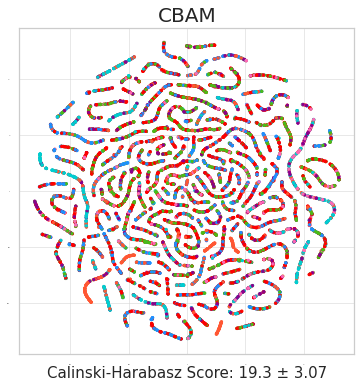

In [26]:
tsne_plot(cbam_tsne_df,cbam_df, 'CBAM', legend=False, )

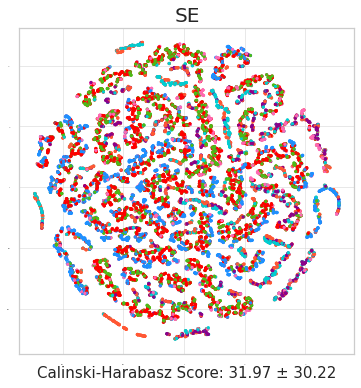

In [27]:
tsne_plot(se_tsne_df,se_df, 'SE', legend=False, )

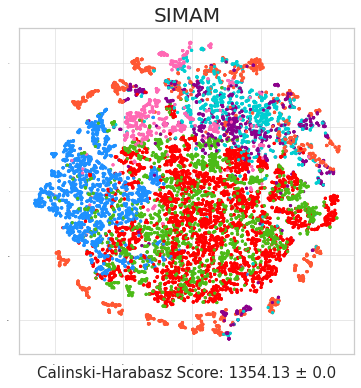

In [28]:
tsne_plot(simam_tsne_df,simam_df, 'SIMAM', legend=False, )

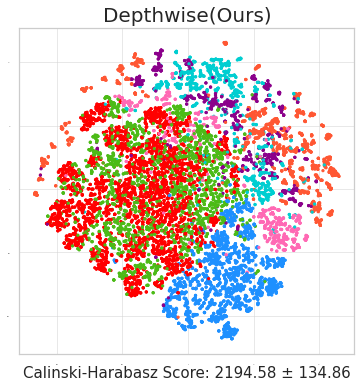

In [29]:
tsne_plot(depthwise_tsne_df,depthwise_df, 'Depthwise(Ours)', legend=False, )

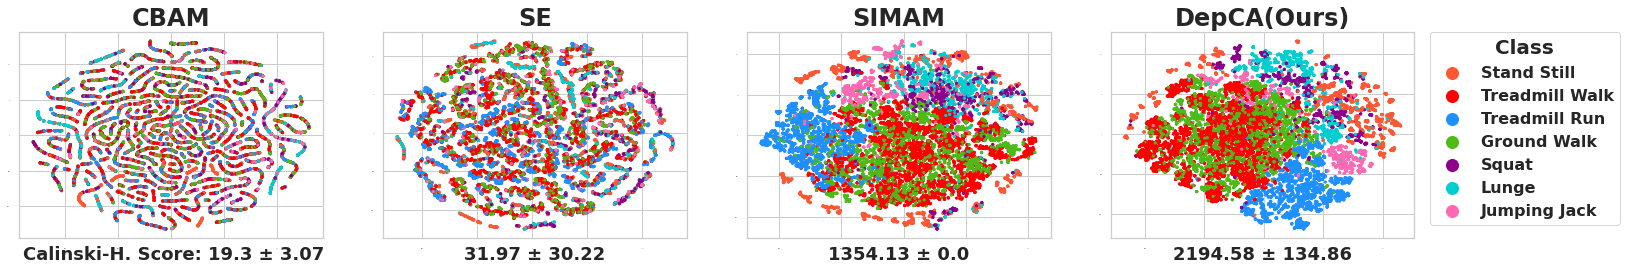

In [27]:
# Draw as subplots
fig, axes = plt.subplots(1, 4, figsize=(25,3.8))

axes[0].scatter(cbam_tsne_df['tSNE1'], cbam_tsne_df['tSNE2'], c=cbam_tsne_df['color'],s=5)
axes[0].set_title('CBAM', fontsize=24, fontweight='bold')
axes[1].scatter(se_tsne_df['tSNE1'], se_tsne_df['tSNE2'], c=se_tsne_df['color'],s=5)
axes[1].set_title('SE', fontsize=24, fontweight='bold')
axes[2].scatter(simam_tsne_df['tSNE1'], simam_tsne_df['tSNE2'], c=simam_tsne_df['color'],s=5)
axes[2].set_title('SIMAM', fontsize=24, fontweight='bold')
axes[3].scatter(depthwise_tsne_df['tSNE1'], depthwise_tsne_df['tSNE2'], c=depthwise_tsne_df['color'],s=5)
axes[3].set_title('DepCA(Ours)', fontsize=24, fontweight='bold')
# create legend for last subplot
axes[3].scatter([],[], c='#FF5733', label='Stand Still')
axes[3].scatter([],[], c='#FF0000', label='Treadmill Walk')
axes[3].scatter([],[], c='#1E90FF', label='Treadmill Run')
axes[3].scatter([],[], c='#4CBB17', label='Ground Walk')
axes[3].scatter([],[], c='#8B008B', label='Squat')
axes[3].scatter([],[], c='#00CED1', label='Lunge')
axes[3].scatter([],[], c='#FF69B4', label='Jumping Jack')

axes[3].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., title='Class', fontsize=16, title_fontsize=20, markerscale=2)
# make legend text bold
for text in axes[3].get_legend().get_texts():
    plt.setp(text, fontweight='bold')
# set legend title bold
axes[3].get_legend().get_title().set_fontweight('bold')

# remove all x and y ticks
for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=0)

# write Calinski-Harabasz Score mean and std
font_calinski_size = 18
axes[0].text(0.51, -0.08, f"Calinski-H. Score: {cbam_df['Calinski Harabasz Score'].mean().round(2)} ± {cbam_df['Calinski Harabasz Score'].std().round(2)}", ha='center', va='center', transform=axes[0].transAxes, fontsize=font_calinski_size, fontweight='bold')
axes[1].text(0.5, -0.08, f"{se_df['Calinski Harabasz Score'].mean().round(2)} ± {se_df['Calinski Harabasz Score'].std().round(2)}", ha='center', va='center', transform=axes[1].transAxes, fontsize=font_calinski_size, fontweight='bold')
axes[2].text(0.5, -0.08, f"{simam_df['Calinski Harabasz Score'].mean().round(2)} ± {simam_df['Calinski Harabasz Score'].std().round(2)}", ha='center', va='center', transform=axes[2].transAxes, fontsize=font_calinski_size, fontweight='bold')
axes[3].text(0.5, -0.08, f"{depthwise_df['Calinski Harabasz Score'].mean().round(2)} ± {depthwise_df['Calinski Harabasz Score'].std().round(2)}", ha='center', va='center', transform=axes[3].transAxes, fontsize=font_calinski_size, fontweight='bold')


# plt.tight_layout()
# save
plt.savefig(f"results/channelattentions/tsne_comparison.png", bbox_inches='tight', dpi=300)


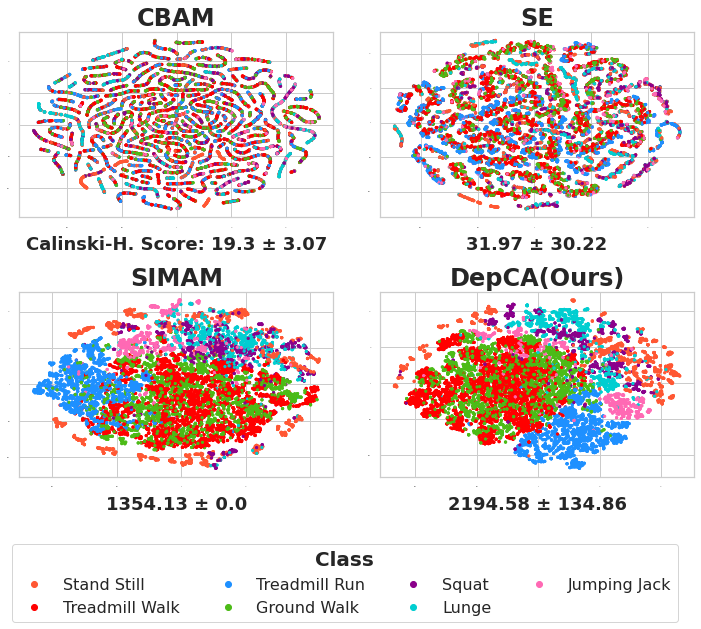

In [26]:
import matplotlib.pyplot as plt

# Adjusted to 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # Adjust figsize as needed

# Flatten axes array for easy access
axes = axes.flatten()

# Your scatter plots (adjust as needed)
axes[0].scatter(cbam_tsne_df['tSNE1'], cbam_tsne_df['tSNE2'], c=cbam_tsne_df['color'], s=5)
axes[0].set_title('CBAM', fontsize=24, fontweight='bold')
axes[1].scatter(se_tsne_df['tSNE1'], se_tsne_df['tSNE2'], c=se_tsne_df['color'], s=5)
axes[1].set_title('SE', fontsize=24, fontweight='bold')
axes[2].scatter(simam_tsne_df['tSNE1'], simam_tsne_df['tSNE2'], c=simam_tsne_df['color'], s=5)
axes[2].set_title('SIMAM', fontsize=24, fontweight='bold')
axes[3].scatter(depthwise_tsne_df['tSNE1'], depthwise_tsne_df['tSNE2'], c=depthwise_tsne_df['color'], s=5)
axes[3].set_title('DepCA(Ours)', fontsize=24, fontweight='bold')

# Create a legend for the plot
# Adjust legend labels as necessary
legend_elements = [plt.Line2D([0], [0], marker='o', color='#FF5733', label='Stand Still', linestyle=''),
                   plt.Line2D([0], [0], marker='o', color='#FF0000', label='Treadmill Walk', linestyle=''),
                   plt.Line2D([0], [0], marker='o', color='#1E90FF', label='Treadmill Run', linestyle=''),
                    plt.Line2D([0], [0], marker='o', color='#4CBB17', label='Ground Walk', linestyle=''),
                    plt.Line2D([0], [0], marker='o', color='#8B008B', label='Squat', linestyle=''),
                    plt.Line2D([0], [0], marker='o', color='#00CED1', label='Lunge', linestyle=''),
                    plt.Line2D([0], [0], marker='o', color='#FF69B4', label='Jumping Jack', linestyle='')
                  ]
# Place legend at the bottom
# fig.legend(handles=legend_elements, loc='lower center', ncol=4, fontsize=16, title='Class', title_fontsize=20)
# Place legend at the bottom with more space
legend = fig.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=4, fontsize=16, title='Class', title_fontsize=20)

# Make legend text bold
# for text in legend.get_texts():
#     plt.setp(text, fontweight='bold')
# Set legend title bold
legend.get_title().set_fontweight('bold')

# Remove all x and y ticks
for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=0)

# Adjust text positioning for Calinski-Harabasz Score
font_calinski_size = 18
axes[0].text(0.5, -0.15, f"Calinski-H. Score: {cbam_df['Calinski Harabasz Score'].mean().round(2)} ± {cbam_df['Calinski Harabasz Score'].std().round(2)}", ha='center', va='center', transform=axes[0].transAxes, fontsize=font_calinski_size, fontweight='bold')
axes[1].text(0.5, -0.15, f"{se_df['Calinski Harabasz Score'].mean().round(2)} ± {se_df['Calinski Harabasz Score'].std().round(2)}", ha='center', va='center', transform=axes[1].transAxes, fontsize=font_calinski_size, fontweight='bold')
axes[2].text(0.5, -0.15, f"{simam_df['Calinski Harabasz Score'].mean().round(2)} ± {simam_df['Calinski Harabasz Score'].std().round(2)}", ha='center', va='center', transform=axes[2].transAxes, fontsize=font_calinski_size, fontweight='bold')
axes[3].text(0.5, -0.15, f"{depthwise_df['Calinski Harabasz Score'].mean().round(2)} ± {depthwise_df['Calinski Harabasz Score'].std().round(2)}", ha='center', va='center', transform=axes[3].transAxes, fontsize=font_calinski_size, fontweight='bold')
# Repeat for other subplots

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rect parameter as needed for layout
plt.savefig(f"results/channelattentions/tsne_comparison_1col.png", bbox_inches='tight', dpi=300)


# SquidGame

In [ ]:
without_qr_dir = '../outputs/squid_game/EXP6001/cv0/channel_test_attention_npy'
with_qr_dir = '../outputs/squid_game/'